<a href="https://colab.research.google.com/github/Ashwin-Rajesh/PyTorch_IEEE_2021/blob/main/1_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Numpy is used for working with matrices
import numpy as np
# Matplotlib is used for plotting graphs
import matplotlib.pyplot as plt

---
# Getting started with numpy

Numpy is used for working with matrices and linear algebra in python. First, lets take a look at creating some matrices

In [4]:
# Creating numpy arrays
print("Zeroes")
print(np.zeros((2, 3)))             # Create a matrix full of zeroes  

print("Ones")
print(np.ones((2, 3)))              # Create a matrix full of ones  

print("Identity")
print(np.eye(5))                    # Create 5 * 5 a identity matrix

print("From list")
print(np.asarray([[1, 2], [3, 4]])) # Create a matrix from a list

print("In a range")
print(np.arange(0, 100, 10))        # From 0(incl) to 100(excl) with difference 10

Zeroes
[[0. 0. 0.]
 [0. 0. 0.]]
Ones
[[1. 1. 1.]
 [1. 1. 1.]]
Identity
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
From list
[[1 2]
 [3 4]]
In a range
[ 0 10 20 30 40 50 60 70 80 90]


In [5]:
# Array slicing
a = np.random.randn(3,5)
print(a)
print((a[1:3, 2:5]))

[[-0.90827393 -0.11328758  0.0808043   0.50672006 -0.3646022 ]
 [ 0.99168185 -0.42486095 -2.43530058 -1.22014562  1.09275085]
 [ 0.81671861  1.17828507 -1.35382173 -0.46438357 -0.13342396]]
[[-2.43530058 -1.22014562  1.09275085]
 [-1.35382173 -0.46438357 -0.13342396]]


---
# Linear Regression

Linear regression means fitting a straight line (in 2D) or hyperplane (in higher dimensions) to best fit some data, to be used for predicting outputs for future unknown inputs. 

In real life, points from even a very linear system will not lie on a straight line due to noise. Here, we generate some data on our own using the



In [59]:
# Define start, end and no. of points in te dataset
start = 0                           
end   = 100
size  = 100

# Variance of the noise
var   = 10

# 
m = 5                               # Slope of actual line
b = -10                             # Intercept of actual line

np.random.seed(0)                   # Seed to get same value for testing (Comment later)
x = np.linspace(start, end, size)   # Generate inputs

# Generate gaussian noise
noise = var * np.random.randn(size)
# Generate outputs
y = (m * x + b) + noise

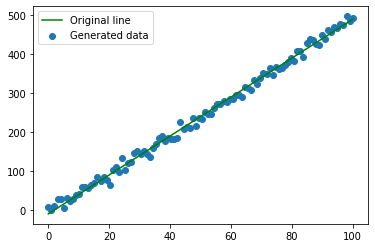

In [60]:
# Plot points using the scatter function
plt.scatter(x, y, label="Generated data")
# Plot a line using plot function
plt.plot(x, m*x + b, 'g', label="Original line")
# Show the labels
plt.legend()
# Show the actual plot
plt.show()

This is the data that we have generated. We can see that it is impossible to create a line that goes through all these points. 

So, we need to find a line that is "the best" out of all possible lines to define this data. But, how to we define "the best"? This is why we need an "**error function**"

---
Note : Following code sections are for visualizations. You can check them out if you are curious about the visualizations used.

In [3]:
#@title
# For 3d plotting
from mpl_toolkits import mplot3d

In [ ]:
#@title
# These functions are for visualizing the error v/s parameters
def find_error_mat(m_test, b_test):
  x_copy = x.copy().reshape(1, 1, x.shape[0])
  x_copy = np.tile(x_copy, (m_test.shape[0], m_test.shape[1], 1))

  y_copy = y.copy().reshape(1, 1, y.shape[0])
  y_copy = np.tile(y_copy, (m_test.shape[0], m_test.shape[1], 1))

  m_copy = np.tile(m_test.reshape(m_test.shape[0], m_test.shape[1], 1), (1, 1, x.shape[0]))
  b_copy = np.tile(b_test.reshape(b_test.shape[0], b_test.shape[1], 1), (1, 1, x.shape[0]))
  
  y_pred = m_copy * x_copy + b_copy
  return np.average(np.square(y_copy - y_pred), axis=2)

In [44]:
#@title
# Plots a wireframe of the slope and intercept v/s the error, and plots points on it
def vis_errors(m_pred, b_pred, error, single_pt = False, m_start=0, m_end=2*m, b_start=0, b_end=2*b, label="Points"):
  m_arr   = np.linspace(m_start, m_end, 10)

  b_arr   = np.linspace(b_start, b_end, 10)

  X, Y = np.meshgrid(m_arr, b_arr)

  Z = find_error_mat(X, Y)

  fig = plt.figure()
  ax = plt.axes(projection='3d')
  ax.plot_wireframe(X, Y, Z, label="Error function")
  
  ax.scatter3D(m_pred, b_pred, error, color='r', s=100, label=label)
  if(not single_pt):
    ax.plot3D(m_pred, b_pred, error, color='g')
  
  ax.view_init(30, 85)
  ax.set_xlabel('Slope')
  ax.set_ylabel('Intercept')
  ax.set_zlabel('Error')
  ax.legend()
  plt.show()

In [46]:
#@title
# Plot a prediction
def vis_prediction(m_pred, b_pred):
  plt.plot(x, y_pred, 'r', label='Predicted')     # Prediction line
  plt.plot(x, m*x + b, 'g', label='Actual')       # Actual line
  
  plt.scatter(x, y, label='Data')                 # Datapoints we have generated
  
  plt.legend()                                    # Show the labels
  
  plt.show()                                      # Show the plot

---
# Error function

The error function is a measure of how good of a fit a line is to some data. The first function that can be used to define this would be the distance of the line from the actual point.

This is of called the "Euclidean position error", defined by

\\[ E(x, y) = \sqrt{(x - \hat{x})^{2} + (y - \hat{y})^{2}} \\]

- x, y  : Prediction
- $ \hat{x}, \hat{y} $ : Actual point

Minimizing this function would be the same as minmizing the function

\\[ E(x, y) = (x - \hat{x})^{2} + (y - \hat{y})^{2} \\]

When we have multiple real points and predictions, indexed as $ (\hat{x}_i, \hat{y}_i) and (x_i, y_i) , i \in \{0, 1, ... N-1\} $, we take the average of the errors for these through i,

\\[ E(x, y) = \sum_{i=0}^{N-1}((x - \hat{x})^{2} + (y - \hat{y})^{2}) \\]

Normally, for predicting the value for comparing with an actual point, we input x and get a value y. So, the prediction and the point have same x value. So, only the y term remains.

\\[ E(x, y) = \sum_{i=0}^{N-1}(y - \hat{y})^{2} \\]

This function is called the "mean squared error".


---
# Our prediction model

Our model is a straight line, defined by 1 input and 1 output.

\\[ y = m \times x + b\\]

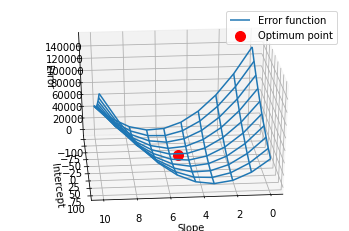

In [61]:
def find_error(m_test, b_test):
  # We find y
  y_pred = m_test * x + b_test
  # Since same x was used to generate y predictions, y
  return np.average(np.square(y - y_pred))

# Plot the slope and intercept v/s error
vis_errors(m, b, find_error(m, b), True, b_start = -100, b_end=100, label="Optimum point")

---
# Gradient descent algorithm

Our problem can be defined as finding values of slope and intercept to minimize the error. From the graph shown above, this can be thought of as finding the lowest point on the curve.

Gradient descent is an algorithm that can be used for exactly this!

We can think of it as moving in the direction of steepest slope .In calculus, the direction of steepest descent is found by the gradient, giving it the name "gradient descent"

This visualization shows how gradient descent works (Here, we are optimizing a function with x and y as inputs)

![Gradient Descent visualization](./docs/gradient_descent.gif)

Now what is actually happening here? The gradient, in vector calculus is defined as

\\[ \Delta E (x, y) = \frac{\partial E}{\partial x} \hat{i} + \frac{\partial E}{\partial y}\hat{j} \\]

- $ \hat{i} $ is the x axis in the above figure

- $ \hat{j} $ is the y axis in the above figure

- E is the error function

So, the gradient is $ \frac{\partial E}{\partial x} $ in the x direction and $ \frac{\partial E}{\partial y} $ in the y direction

Gradient descent simply says we must take steps in the direction of decreasing gradient. This could be written as

\\[ x = x - c * \frac{\partial E}{\partial x} \\]

\\[ y = y - c * \frac{\partial E}{\partial y} \\]

- c is a parameter that is used to control the size of each "step". This is called the "learning rate"

- The derivative term is negative because we are moving in direction of decreasing E, whereas gradient is in direction of increasing E

---

# Now, lets code it up!

 Initial slope : 18.676, Initial intercept : 9.060
 Error 653247.734 


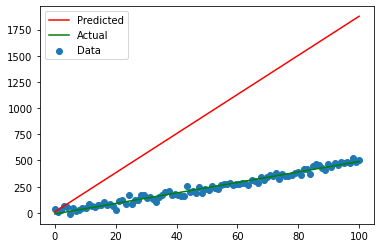

 Predicted slope : -4.7029, Predicted offset : 8.7098
 Error 298407.773 


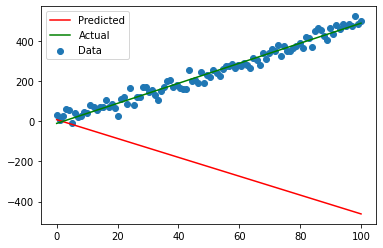

 Predicted slope : 11.0883, Predicted offset : 8.9437
 Error 136514.664 


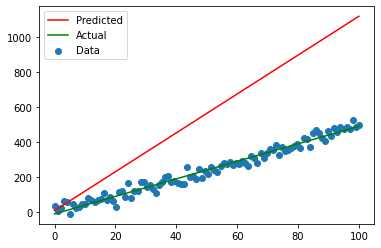

 Predicted slope : 0.4221, Predicted offset : 8.7828
 Error 62652.126 


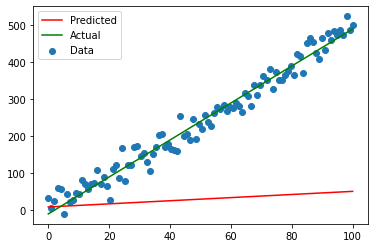

 Predicted slope : 7.6267, Predicted offset : 8.8886
 Error 28952.884 


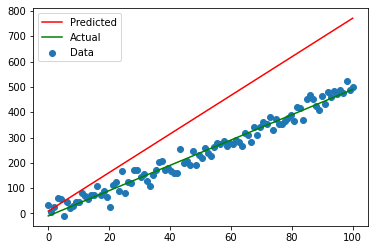

 Predicted slope : 2.7603, Predicted offset : 8.8142
 Error 13577.848 


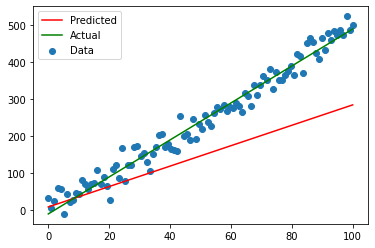

 Predicted slope : 6.0474, Predicted offset : 8.8616
 Error 6563.095 


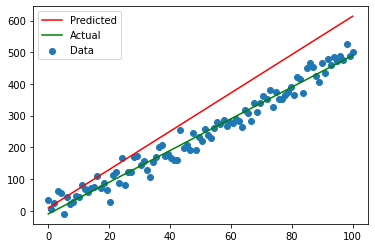

 Predicted slope : 3.8272, Predicted offset : 8.8267
 Error 3362.659 


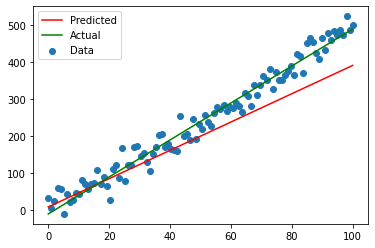

 Predicted slope : 5.3269, Predicted offset : 8.8474
 Error 1902.478 


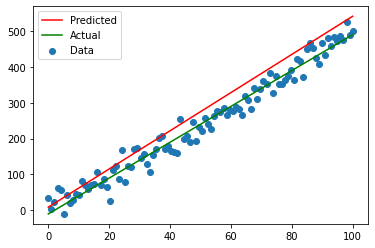

 Predicted slope : 4.3139, Predicted offset : 8.8305
 Error 1236.274 


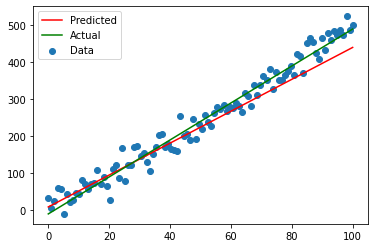

 Predicted slope : 4.9982, Predicted offset : 8.8390


In [35]:
# First, initialize slope and intercept randomly
m_pred = 10 * np.random.randn()
b_pred = 10 * np.random.randn()
 
print(" Initial slope : %.3f, Initial intercept : %.3f"%(m_pred, b_pred))
 
# Number of iterations
num_iter = 10
 
# Learning rate is the factor that is multiplied with the gradient
learning_rate = 1e-4                # Value we got from trial and error
# learning_rate = 2.5e-4              # Uncomment this to see overshoot of gradient descent

# To store values of slope, intercept and error over training, for visualizing later
m_hist = []
b_hist = []
error_hist = []

# Start training
for i in range(num_iter):
  y_pred = (x * m_pred) + b_pred

  # Compute error
  error = find_error(m_pred, b_pred)
  print(" Error %.3f "%(error))
 
  # Visualize the current prediction
  vis_prediction(m_pred, b_pred)

  # Append to history to visualize later
  m_hist.append(m_pred)
  b_hist.append(b_pred)
  error_hist.append(error)
  
  # Derivative of error with respect to y
  d_y = 2 * (y_pred - y)
 
  # Derivative of error with respect to slope
  d_m = d_y * x
  # Derivative of error with respect to intercept
  d_b = d_y

  # Update predictions by gradient descept rule
  m_pred = m_pred - learning_rate * np.average(d_m)
  b_pred = b_pred - learning_rate * np.average(d_b)
 
 
  print(" Predicted slope : %.4f, Predicted offset : %.4f"%(m_pred, b_pred))

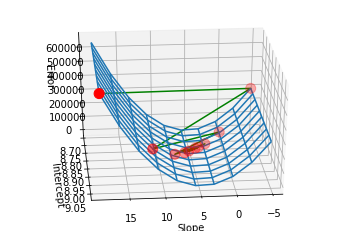

In [36]:
vis_errors(m_hist, b_hist, error_hist, False, max(max(m_hist),10), min(min(m_hist),0), max(b_hist), min(b_hist))

You might be wondering

### "*Why go through all this trouble when you have already plotted the graph - Cant you just find the minimum from that?*"! 

And you are right! This is quite unnecessary in our case. However, it might not be possible to find the error for all inputs and find the one with the mininum for problems with larger number of dimensions. Neural networks nowadays could have millions of parameters!

When we need to optimize a value with so many parameters to tweak is when we use gradient descent!

For linear models like these, there are tons of optimization methods that are much more efficient than gradient descent.

However, for solving more complicated real world problems like computer vision, a straight line wont do! Since the real word is non-linear, our models need to be as well. Next, we will look at incorporating this non-linearity into out models.

---
# Additional Challenge!

Here, we have just 1 dimensional input. Try implementing the same for inputs with 10 dimensions!